
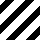
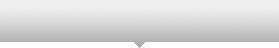
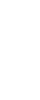
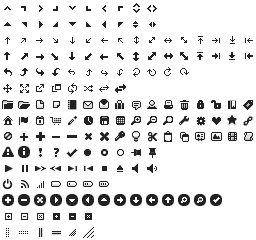
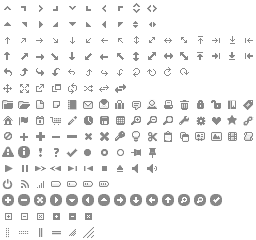
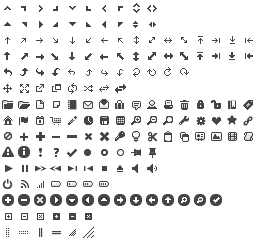
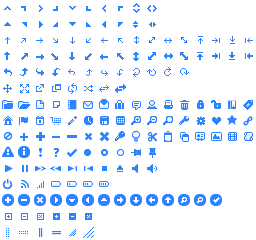
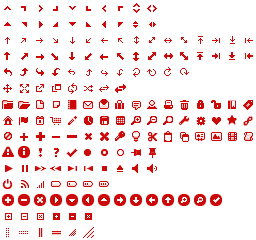
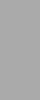
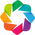
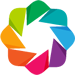
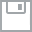
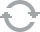
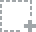
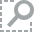
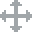
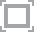
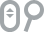

In [160]:
#imports

import pandas as pd
from bokeh.plotting import figure, output_notebook,show
output_notebook()
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [32]:
#Load in data
time = pd.Series([0, 0.5, 1, 1.5, 2, 2.5])
distance = pd.Series([0, 20.5, 31.36, 36.25, 30.41, 28.23])

data = pd.concat([time, distance], axis=1)
data

,0,1
0,0.0,0.00
1,0.5,20.50
2,1.0,31.36
3,1.5,36.25
4,2.0,30.41
5,2.5,28.23


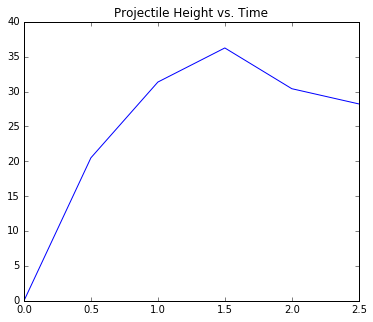

In [33]:
#plot data
fig = plt.figure(figsize=(6,5))
plt.title('Projectile Height vs. Time')
_=plt.plot(data[0].values,data[1].values)


In [59]:
#1a) Find a good model to fit this data.
#sm.add_constant adds a column of ones to allow for finding an intercept to your data.
x = data[0].values
X = sm.add_constant(x, prepend=True)
y = data[1].values

results = sm.OLS(y, X).fit()

In [60]:
p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(0,3,50)
p.line(xx, results.predict(np.vander(xx,2)), color='red')
show(p)

In [61]:
results.summary()

#rsquared is just over 50% - not a great model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     4.318
Date:                Sun, 22 Nov 2015   Prob (F-statistic):              0.106
Time:                        16:45:17   Log-Likelihood:                -21.178
No. Observations:                   6   AIC:                             46.36
Df Residuals:                       4   BIC:                             45.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         11.9033      7.317      1.627      0.179        -8.412    32.219
x1            10.0440      4.833      2.078      0.106        -3.376    23.464
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.085
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.613
Skew:                          -0.204   Prob(JB):                        0.736
Kurtosis:                       1.488   Cond. No.                         3.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Run exponential model, plot both on same graph
X2 = np.c_[x**2, x, np.ones(len(x))]
res = sm.OLS(y, X2).fit()

p2 = figure(title='Blue = True; Red = Exponential. Green = OLS')
p2.circle(x, y, size=8,color='blue')

xx2 = np.linspace(0,4,100)
p2.line(xx2, res.predict(np.vander(xx2,3)), color='red')
p2.line(xx, results.predict(np.vander(xx,2)), color='green')

show(p2)


In [70]:
res.summary()

#r2 is over 97% - much better model!
res.params


array([-12.87142857,  42.22257143,   1.17714286])

In [ ]:
#Y INTERCEPT
#equation: y = 1.1771 -12.8714*x + 42.226*x^2



In [71]:
#Load in data
year = pd.Series([1976, 1980, 1987, 1993, 1998])
cost = pd.Series([618, 860, 1324, 1865, 2256])

health = pd.concat([year, cost], axis=1)
health

,0,1
0,1976,618
1,1980,860
2,1987,1324
3,1993,1865
4,1998,2256


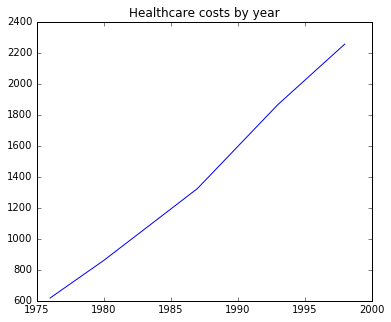

In [72]:
#plot data
fig = plt.figure(figsize=(6,5))
plt.title('Healthcare costs by year')
_=plt.plot(health[0].values,health[1].values)

In [105]:
#2a) Find a good model to fit this data.
#sm.add_constant adds a column of ones to allow for finding an intercept to your data.
x = health[0].values
X = sm.add_constant(x, prepend=True)
y = health[1].values

ols = sm.OLS(y, X).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     614.3
Date:                Sun, 22 Nov 2015   Prob (F-statistic):           0.000144
Time:                        18:24:32   Log-Likelihood:                -25.840
No. Observations:                   5   AIC:                             55.68
Df Residuals:                       3   BIC:                             54.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -1.48e+05   6027.491    -24.555      0.000     -1.67e+05 -1.29e+05
x1            75.1916      3.034     24.785      0.000        65.537    84.846
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.733
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.652
Skew:                          -0.817   Prob(JB):                        0.722
Kurtosis:                       2.322   Cond. No.                     4.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
p3 = figure(title='Blue = True; Red = OLS')
p3.circle(x, y, size=8,color='blue')

xx3 = np.linspace(1975,2010,36)
p3.line(xx3, ols.predict(np.vander(xx3,2)), color='red')
show(p3)

In [114]:
#Load in data
a = pd.Series([-1, 0, 1, 2, 3, 5, 7, 9])
b = pd.Series([-1, 3, 2.5, 5, 4, 2, 5, 4])

data3 = pd.concat([a, b], axis=1)
data3

,0,1
0,-1,-1.0
1,0,3.0
2,1,2.5
3,2,5.0
4,3,4.0
5,5,2.0
6,7,5.0
7,9,4.0


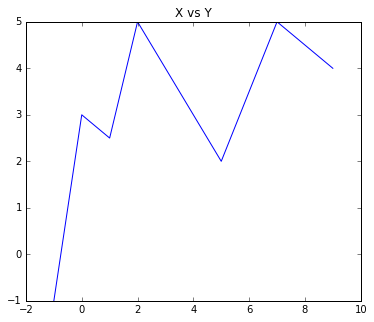

In [118]:
#plot data
fig = plt.figure(figsize=(6,5))
plt.title('X vs Y')
_=plt.plot(data3[0].values,data3[1].values)

In [119]:
x = a
y = b

a

0   -1
1    0
2    1
3    2
4    3
5    5
6    7
7    9
dtype: int64

In [121]:
X = np.c_[x**5, x**4, x**3, x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()

p = figure(title='Blue = True; Red = OLS')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-2,11,100)
p.line(xx, res.predict(np.vander(xx,6)), color='red')
show(p)

In [156]:
wine = df = pd.DataFrame.from_csv("C:\Users\lizh\Dropbox (Personal)\General Assembly\DAT_SF_18\homework\winequality-red.csv",
                                  index_col=None ,sep=';')
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


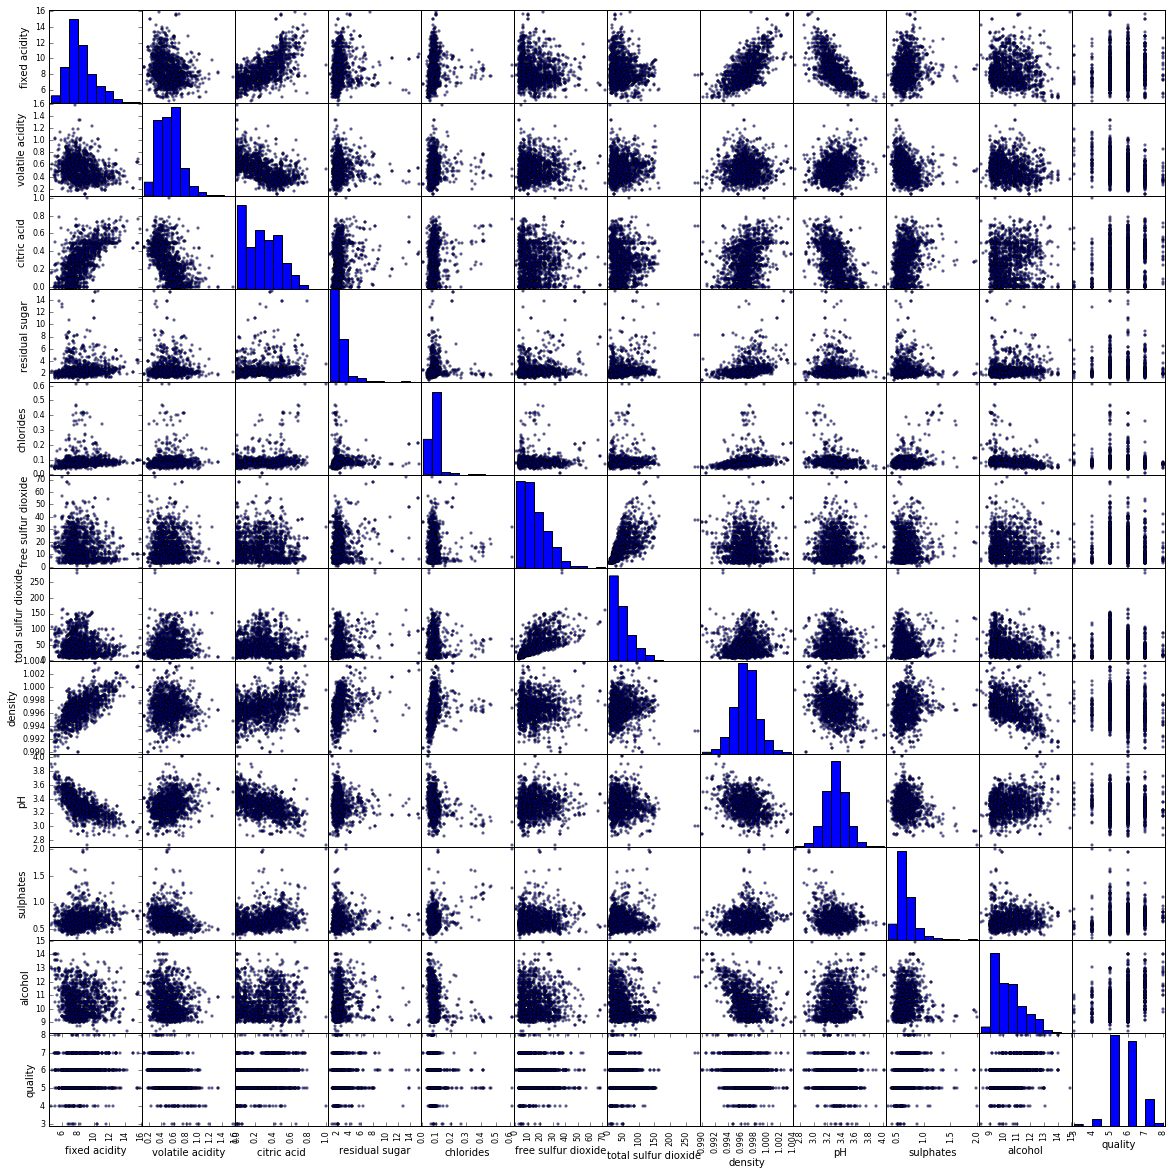

In [158]:
#4
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(wine, figsize = (20,20))

#5
#a Citric acid, density, chlorides and pH look linearly related to fixed acidity
#  Chlorides has a very small range
#b The quality score is the only categorical variable that we have.  It ranges from 3 to 8  
#c There are 12 features, they are not normalized

In [194]:
#6

#a I have normalized the data so it is all on the same scale

#OLS on normalized data
scaler = StandardScaler()
norm = scaler.fit_transform(wine)

wine_norm = pd.DataFrame(norm, columns=wine.columns)

x = wine_norm.ix[:,:-1].values
X = sm.add_constant(x, prepend=True)
y = wine_norm['quality'].values

ols = sm.OLS(y, X).fit()

ols.summary()

#Rsquared= 0.361 - not a good fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Mon, 23 Nov 2015   Prob (F-statistic):          1.79e-145
Time:                        19:33:01   Log-Likelihood:                -1911.4
No. Observations:                1599   AIC:                             3847.
Df Residuals:                    1587   BIC:                             3911.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.273e-15      0.020   6.34e-14      1.000        -0.039     0.039
x1             0.0539      0.056      0.963      0.336        -0.056     0.164
x2            -0.2403      0.027     -8.948      0.000        -0.293    -0.188
x3            -0.0440      0.036     -1.240      0.215        -0.114     0.026
x4             0.0285      0.026      1.089      0.276        -0.023     0.080
x5            -0.1092      0.024     -4.470      0.000        -0.157    -0.061
x6             0.0565      0.028      2.009      0.045         0.001     0.112
x7            -0.1330      0.030     -4.480      0.000        -0.191    -0.075
x8            -0.0418      0.051     -0.827      0.409        -0.141     0.057
x9            -0.0791      0.037     -2.159      0.031        -0.151    -0.007
x10            0.1923      0.024      8.014      0.000         0.145     0.239
x11            0.3645      0.035     10.429      0.000         0.296     0.433
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
#Logistic regression with no regularization
model_lr = LogisticRegression()

features = wine_norm.drop('quality',axis=1)
target = wine.quality

cross_val_score(model_lr,features,target,cv=3).mean()

#CV scores is only 0.568

0.56792581270681053

In [218]:
#Logistic regression with extreme regularization
model_lr = LogisticRegression(C=5)

features = wine_norm.drop('quality',axis=1)
target = wine.quality

cross_val_score(model_lr,features,target,cv=3).mean()

#CV scores is only 0.570

0.56981138978797696

In [219]:
#Logistic regression with extreme regularization
model_lr = LogisticRegression(C=100)

features = wine_norm.drop('quality',axis=1)
target = wine.quality

cross_val_score(model_lr,features,target,cv=3).mean()

#CV scores is only 0.567

0.56730979108805746

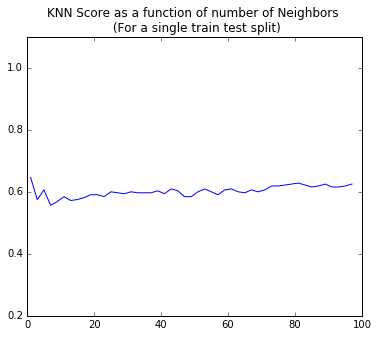

In [217]:
#try KNN with different # of neighbors
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#We make a list of numbers from 1-99 only keeping odd values
n_neighbors = range(1,99,2)
scores = []

#Loop through each value for n and calculate the score, appending to our list
for n in n_neighbors:
   myknn = KNeighborsClassifier(n).fit(X_train,y_train)
   score = myknn.score(X_test, y_test)
   scores.append(score)

#Step 2: Put the scores and values for K in a dataframe

df = pd.DataFrame(n_neighbors, columns=['n'])
df['scores'] = scores

#Step 3: Plot them!
fig = plt.figure(figsize=(6,5))
plt.title('KNN Score as a function of number of Neighbors \n (For a single train test split)')
plt.ylim(0.2,1.1)
_=plt.plot(df.n, df.scores)

#most accurate appears to be 1 neighbor but that is still just over 60%

In [222]:
from sklearn.linear_model import LinearRegression

#Split our data
X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=1)

sk_lrn_model = LinearRegression()
sk_lrn_model.fit(X_train, y_train)

# The coefficients
print "Sklearn Model:"
print 'Intercept: {}'.format(sk_lrn_model.intercept_)
print 'Coefficients: {}'.format(sk_lrn_model.coef_)
# The mean square error
print("Residual sum of squares (Train): {0:.3f}".format(np.mean((sk_lrn_model.predict(X_train) - y_train) ** 2)))
print("Residual sum of squares (Test): {0:.3f}".format(np.mean((sk_lrn_model.predict(X_test) - y_test) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: {0:.3f}'.format(sk_lrn_model.score(X_test, y_test)))

Sklearn Model:
Intercept: 5.64455123853
Coefficients: [ 0.07259391 -0.20884172 -0.04995238  0.02534502 -0.08411056  0.05153578
 -0.11680133 -0.06689119 -0.05942308  0.14974917  0.28111929]
Residual sum of squares (Train): 0.428
Residual sum of squares (Test): 0.387
Variance score: 0.344


In [230]:
#Try dropping two variables that don't have much variation (chlorides & residual sugar) 
#Logistic regression with no regularization
model_lr = LogisticRegression()

features = wine_norm.drop('quality',axis=1)
features = features.drop('chlorides',axis=1)
features = features.drop('residual sugar',axis=1)
target = wine.quality

cross_val_score(model_lr,features,target,cv=3).mean()

#model slightly worse than including all variables

0.56228785518713775